In [32]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [74]:
df = pd.read_csv('twitter.csv', encoding='latin1')
df.head(20)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [76]:
df.drop(columns=['ItemID'],inplace=True)

In [78]:
df['SentimentText']=df['SentimentText'].astype(str)

In [77]:
df['Sentiment'].value_counts()

Sentiment
1    56457
0    43532
Name: count, dtype: int64

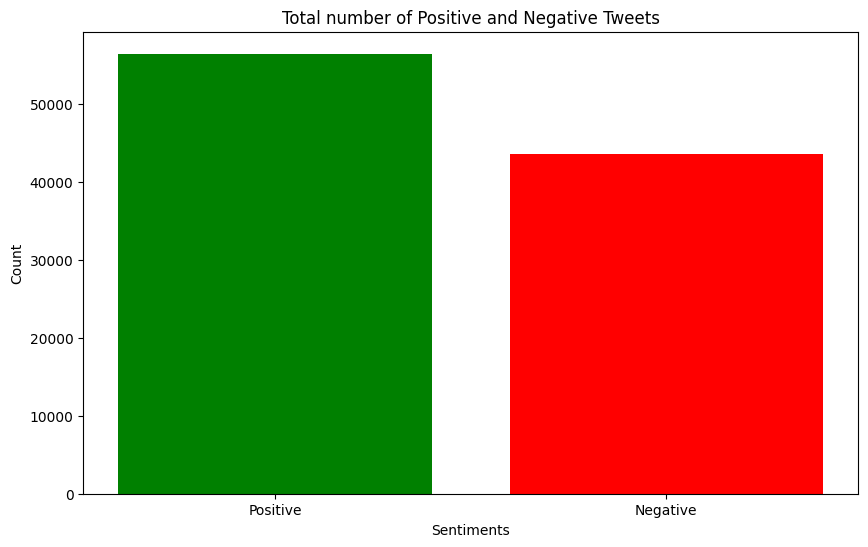

In [79]:
plt.figure(figsize=(10,6))

Label_counts=df['Sentiment'].value_counts()

plt.bar(['Positive','Negative'],height=Label_counts,color=['Green','Red','Yellow'])
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.title('Total number of Positive and Negative Tweets')
plt.show()

In [80]:
def Clean_Tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub('[0-9]+', '', tweet)
    tweet = re.sub(r'<[^>]+>', '', tweet)
    tweet = re.sub(r"[!@#$%^&*(){}£\/ðâ¦±~''.;]+", '', tweet)
    tweet = re.sub(r'https?|http://\S+|www\.\S+', '', tweet)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    tweet_tokens = word_tokenize(tweet)
    tweet_words = [word for word in tweet_tokens if word not in stopwords.words('english')]
    new_tweet = ' '.join(tweet_words)
    return new_tweet
    

In [81]:
txt=df['SentimentText'][30]
print(f'Old tweet -> {txt}')
new_txt=Clean_Tweet(txt)
print(f'Tweet after cleaning ->{new_txt}')

Old tweet ->    I hate it when any athlete appears to tear an ACL on live television.
Tweet after cleaning ->hate athlete appears tear acl live television


In [82]:
df['preprocessed_text']=df['SentimentText'].apply(Clean_Tweet)

In [83]:
df.head(20)

,Sentiment,SentimentText,preprocessed_text
0,0,is so sad for my APL frie...,sad apl friend
1,0,I missed the New Moon trail...,missed new moon trailer
2,1,omg its already 7:30 :O,omg already
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry ive dentist since ...
4,0,i think mi bf is cheating on me!!! ...,think mi bf cheating tt
5,0,or i just worry too much?,worry much
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin
7,0,Sunny Again Work Tomorrow :-| ...,sunny work tomorrow tv tonight
8,1,handed in my uniform today . i miss you ...,handed uniform today miss already
9,1,hmmmm.... i wonder how she my number @-),hmmmm wonder number


In [85]:
x=df['preprocessed_text'].values
y=df['Sentiment'].values


In [89]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.25, random_state=42)

In [90]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (79991,)
Shape of X_test:  (19998,)


In [91]:
v = TfidfVectorizer()

X_train = v.fit_transform(X_train)
X_test= v.transform(X_test)

In [99]:
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [101]:
y_pred = model_svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7586758675867586


In [102]:
import pickle
pickle.dump(model_svm,open("model","wb"))

In [103]:
with open("model", "rb") as file:
    loaded_model = pickle.load(file)

In [104]:
def CheckPosorNeg(tweet):
    Clean_Tweet(tweet)
    tweet=v.transform([tweet])
    sentiment = loaded_model.predict(tweet)
    if sentiment==1:
         print("Sentiment is positive")
    else:
         print("Sentiment is negative")

In [107]:
tweet=input("Enter your tweet:")
print(tweet)
CheckPosorNeg(tweet)
    


Enter your tweet: Feeling a little bit saad today but thats fine


Feeling a little bit saad today but thats fine
Sentiment is negative
